In [15]:
import tensorflow as tf
import tensorflow
import matplotlib.pyplot as plt
import os
os.environ["TF_XLA_FLAGS"]="--tf_xla_enable_xla_devices"
%matplotlib inline

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [28]:
content_path = tf.keras.utils.get_file('content_image',
                                      'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1200px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg')

style_path = tf.keras.utils.get_file('styled_image', 
                                       'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkYTIYll2LZW5zJytrzmdTAnkOOoL-aUDl-A&usqp=CAU')

24576/16697 [============================================] - 0s 4us/step


In [23]:
# custom function for image scaling
def img_scaler(image, max_dim=512):

    # Casts a tensor to a new type.
    original_shape = tf.cast(tf.shape(image)[:-1],tf.float32)
    
    # Creates a scale constant for the image
    scale_ratio = max_dim/max(original_shape)
    
    # Casts a tensor to a new type.
    new_shape = tf.cast(original_shape * scale_ratio,tf.int32)
    
    # Resizes the image based on the scaling constant generated above
    return tf.image.resize(image,new_shape)

In [24]:
# custom function for preprocessing image
def load_image(path_to_img):
    # Reads and outputs the entire contents of the input filename.
    img = tf.io.read_file(path_to_img)
    
    # Detect whether an image is a BMP, GIF, JPEG, or PNG, and 
    # performs the appropriate operation to convert the input 
    # bytes string into a Tensor of type dtype
    img = tf.image.decode_image(img, channels=3)
    
    # Convert image to dtype, scaling (MinMax Normalization) its values if needed.
    img = tf.image.convert_image_dtype(img,tf.float32)
    
    # Scale the image using the custom function we created
    img = img_scaler(img)
    
    
    # Adds a fourth dimension to the Tensor because
    # the model requires a 4-dimensional Tensor
    return img[tf.newaxis, :]

In [29]:
# Load the Content and Style Images

content_image = load_image(content_path)
style_image = load_image(style_path)

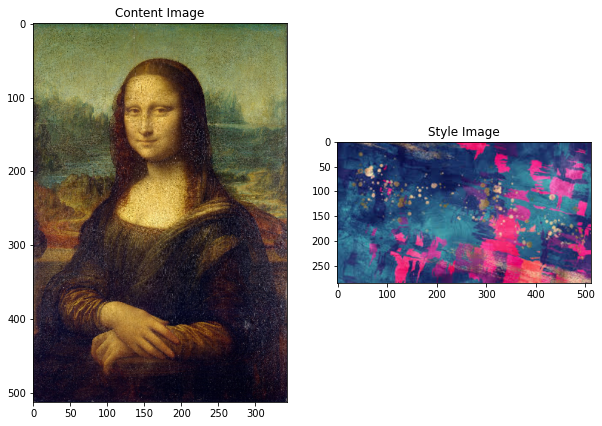

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(content_image[0])
plt.title("Content Image")
plt.subplot(1,2,2)
plt.imshow(style_image[0])
plt.title("Style Image")

plt.show()

In [31]:
# Load the Arbitrary Image Stylization Network
import tensorflow_hub as hub

# Load Magenta's Arbitrary Image Stylization network from TensorFlow Hub  
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

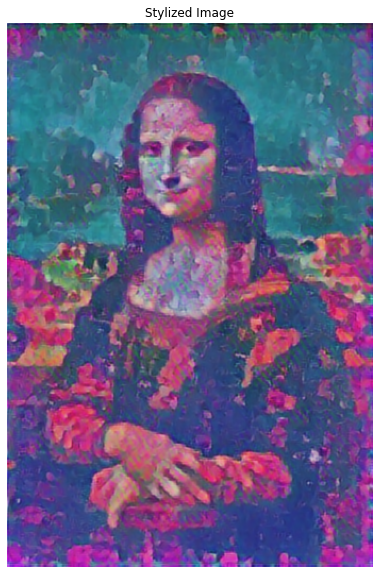

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(stylized_image[0])
plt.title("Stylized Image")
plt.axis("off")
plt.show()